# Assignment 3 - Building a Custom Visualization

---

In this assignment you must choose one of the options presented below and submit a visual as well as your source code for peer grading. The details of how you solve the assignment are up to you, although your assignment must use matplotlib so that your peers can evaluate your work. The options differ in challenge level, but there are no grades associated with the challenge level you chose. However, your peers will be asked to ensure you at least met a minimum quality for a given technique in order to pass. Implement the technique fully (or exceed it!) and you should be able to earn full grades for the assignment.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="readonly/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="readonly/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*

In [2]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("max_columns",None)
%matplotlib notebook

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df


0              1              2              3     \
1992   -8941.531897  127788.667612  -71887.743011  -79146.060869   
1993  -51896.094813  198350.518755 -123518.252821 -129916.759685   
1994  152336.932066  192947.128056  389950.263156  -93006.152024   
1995  -69708.439062  -13289.977022  -30178.390991   55052.181256   

               4              5              6              7     \
1992  425156.114501  310681.166595   50581.575349   88349.230566   
1993  216119.147314   49845.883728  149135.648505   62807.672113   
1994  100818.575896    5529.230706  -32989.370488  223942.967178   
1995  152883.621657   12930.835194   63700.461932   64148.489835   

               8              9              10             11    \
1992  185804.513522  281286.947277  233437.871517 -227244.221822   
1993   23365.577348 -109686.264981  143973.220873  149211.328778   
1994  -66721.580898   47826.269111 -192967.663433  204584.561046   
1995  -29316.268556   59645.677367  -52635.307654   34336.438541   

              12            13             14             15             16    \
1992  86998.326686  77782.575787  302583.367033  209285.868118 -368327.461932   
1993  97627.497748 -47123.013558  189071.044852  116617.008245   19673.406721   
1994  38869.703622  32040.564523 -147185.190711    4025.232730   79921.616963   
1995  35651.001159   5400.939983  100867.454146   54343.043728   -3899.503204   

               17             18             19            20    \
1992  -42368.507428  365805.061905  -55713.947167 -75948.289104   
1993   99051.501841   28371.886237   31873.611779 -41129.903198   
1994  328776.090270 -182624.859166  -36343.057416 -79062.500439   
1995   48050.133302   19412.920262  120522.850238  78198.485628   

               21             22             23            24    \
1992  127397.002082  681788.783886 -172245.504871 -83417.460608   
1993  148282.489943  -75385.183578  -17940.948483   5989.008121   
1994  251626.386131  -78444.334782  203774.943031  15047.966705   
1995  112562.785435   27994.669028  -16385.665394  58009.028372   

               25             26             27             28    \
1992   56824.255135   92522.712383  136754.413630   32188.055555   
1993   12514.078074   51109.775598   50881.532197  149406.296856   
1994  320531.493015  304706.467877  224425.509343 -123087.581536   
1995  -15362.310545  -22595.655584  -30970.881018   26265.814182   

               29             30             31             32    \
1992  300761.958723 -110708.797019 -134230.707771 -442046.330791   
1993   31162.466177   30005.538908  -34700.341831   -2066.208534   
1994   94658.527746  205722.744144 -112143.902641   16981.408505   
1995  209825.692882  115314.999651  123423.806182  135585.934102   

               33             34             35             36    \
1992 -340152.157710 -140151.479686  144029.058606 -221186.898339   
1993    3938.838730  -30049.318662   -7587.984642  125584.101289   
1994  -61737.300147  -17137.926667   67299.909803   -5186.145961   
1995  -26689.803308   79672.291250   43389.236757  149033.922252   

               37             38             39             40    \
1992   55965.424932 -180702.489611   98576.543122 -439883.761477   
1993  135760.854891  -42737.930841  289556.729096  144395.911752   
1994   29057.993918  111944.812978  153957.428589   -2500.229043   
1995   18410.593085   40027.925470  -85627.825115   46419.123742   

               41             42             43             44    \
1992   -7908.591067 -276399.105575 -162147.182452 -229406.050194   
1993    6183.813599 -156545.555735   45894.682118   48913.680537   
1994  283665.150646 -119952.156881 -111918.882280 -273269.441879   
1995  123999.640255  -40862.761530  182670.260147  147434.623791   

               45             46             47             48    \
1992   89269.949403  107596.822187 -118777.306958   98257.130039   
1993   62238.083465   34797.370271   83596.346048  244399.246896   
1994 

<IPython.core.display.Javascript object>


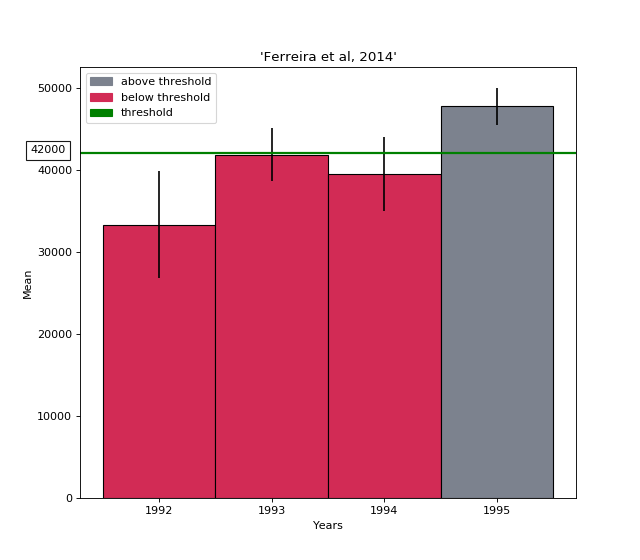

In [40]:
# Take The mean For each yaer
from scipy import stats as fstats
dftransposed = df.T  # Make The index to columns

mean1992 = dftransposed[1992].mean(axis = 0)
mean1993 = dftransposed[1993].mean(axis = 0)
mean1994 = dftransposed[1994].mean(axis = 0)
mean1995 = dftransposed[1995].mean(axis = 0)

std1992 = dftransposed[1992].std(axis = 0)
std1993 = dftransposed[1993].std(axis = 0)
std1994 = dftransposed[1994].std(axis = 0)
std1995 = dftransposed[1995].std(axis = 0)


ci = 95
n = len(dftransposed)
tstar = fstats.t.ppf( 1 - (100 - ci)/2/100, n-1) # two tailed

means = [mean1992, mean1993, mean1994, mean1995]
stds = [std1992 , std1993, std1994, std1995]

moes = []
for std in stds :
     moes.append(tstar *  (std / np.sqrt( n)))
        
    
plt.figure(figsize = (8,7))
years = [1992, 1993, 1994, 1995]
plt.bar(left = years , height = means , yerr = moes ,
        color = [ "#d22b55" , "#d22b55" , "#d22b55","#7c828e"],edgecolor = "black", width = 1 ,picker = 5) # yerr = for error bars 

plt.gca().set_xticks(years) # Setting x ticks
plt.gca().set_xlabel("Years")
plt.gca().set_ylabel("Mean")
plt.gca().set_title("'Ferreira et al, 2014'")
plt.text(-0.1, 4.2e4, "42000", bbox={"facecolor" : "white","alpha" : 0.9},transform=plt.gca().get_yaxis_transform())

plt.axhline(y = 42000 , xmin = 0 ,color = "green" , linewidth = 2.0)

colorthres = {'above threshold':'#7c828e', 'below threshold':'#d22b55' }
labelkeys = list(colorthres.keys())
thesqure = [plt.Rectangle((0,0), height= 1 ,width = 1 ,color = colorthres[label]) for label in labelkeys]
thesqure.append(plt.Rectangle((0,0) ,height=1,width = 1 ,  color = "green" , label = "threshold"))
labelkeys.append("threshold")
plt.legend(thesqure, labelkeys)
